In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('crime.csv')

In [5]:
data.head(2)

,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Time_sine,Time_cos,Month_sine,Month_cos,DoW_sine,DoW_cos
0,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,0.304864,0.952396,0.5,0.866025,0.974928,-0.222521
1,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,0.993572,-0.113203,0.5,0.866025,0.974928,-0.222521


In [6]:
X = data[['City','Crime Description','Victim Age','Victim Gender','Weapon Used','Time_sine','Time_cos','Month_sine','Month_cos','DoW_sine','DoW_cos']]
X.head(3)

,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Time_sine,Time_cos,Month_sine,Month_cos,DoW_sine,DoW_cos
0,Ahmedabad,IDENTITY THEFT,16,M,Blunt Object,0.304864,0.952396,0.5,0.866025,0.974928,-0.222521
1,Chennai,HOMICIDE,37,M,Poison,0.993572,-0.113203,0.5,0.866025,0.974928,-0.222521
2,Ludhiana,KIDNAPPING,48,F,Blunt Object,-0.608761,-0.793353,0.5,0.866025,0.974928,-0.222521


In [7]:
Y = data['Crime Domain']
Y.head(3)

0    Violent Crime
1      Other Crime
2      Other Crime
Name: Crime Domain, dtype: object

In [8]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV 

In [9]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [11]:
Categorical = ['City', 'Crime Description', 'Victim Gender', 'Weapon Used']
Numerical = ['Victim Age', 'Time_sine', 'Time_cos', 'Month_sine', 'Month_cos', 'DoW_sine', 'DoW_cos']
preprocess = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), Categorical), ('num', 'passthrough', Numerical)])

In [12]:
Pipeline = make_pipeline(preprocess, RandomForestClassifier(random_state=42))

In [13]:
param_grid = {'randomforestclassifier__n_estimators': [100, 200, 300], 'randomforestclassifier__max_depth': [None, 10, 20, 30], 'randomforestclassifier__min_samples_split':[2, 5, 10], 'randomforestclassifier__min_samples_leaf': [1,2,4], 'randomforestclassifier__max_features': ['sqrt', 'log2'], 'randomforestclassifier__bootstrap': [True,False]}

In [14]:
Random = RandomizedSearchCV(Pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [15]:
Random.fit(X_train, Y_train)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'randomforestclassifier__bootstrap': [True, False], 'randomforestclassifier__max_depth': [None, 10, ...], 'randomforestclassifier__max_features': ['sqrt', 'log2'], 'randomforestclassifier__min_samples_leaf': [1, 2, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [16]:
model = Random.best_estimator_

In [17]:
model.fit(X_train, Y_train)

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
print(model.named_steps['randomforestclassifier'])

RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, random_state=42)


In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [21]:
cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
cm

array([[ 737,    0,    0,    0],
       [   0, 4580,    0,    0],
       [   0,    0,  393,    0],
       [   0,    0,    0, 2322]])

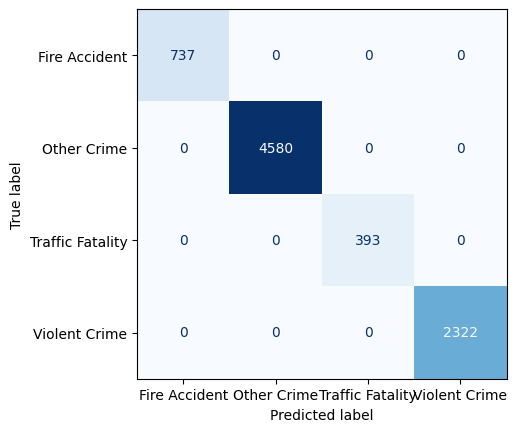

In [22]:
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot(cmap='Blues', colorbar=False)

In [23]:
print(classification_report(Y_test, y_pred))

                  precision    recall  f1-score   support

   Fire Accident       1.00      1.00      1.00       737
     Other Crime       1.00      1.00      1.00      4580
Traffic Fatality       1.00      1.00      1.00       393
   Violent Crime       1.00      1.00      1.00      2322

        accuracy                           1.00      8032
       macro avg       1.00      1.00      1.00      8032
    weighted avg       1.00      1.00      1.00      8032



In [24]:
import joblib

In [25]:
joblib.dump(model, 'crimeRmodel.pkl')

['crimeRmodel.pkl']